# LSTM 예제

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

index2char과 char2index는 각각 문자를 문자 자체로 입력하지 않고 one-hot의 형태로 입력하기 위해서 만들어준 python dict입니다.
char2index를 출력하면 아래와 같은 형태가 됩니다.

In [18]:
sentence = 'In the beginning God created the heavens and the earth.'

x = sentence[:]
y = sentence[:]

char_set = list(set(sentence))
input_size = len(char_set)
hidden_size = len(char_set)

index2char = {i:c for i, c in enumerate(char_set)}
char2index = {c:i for i, c in enumerate(char_set)}

In [19]:
print(x)
print(y)

In the beginning God created the heavens and the earth.
In the beginning God created the heavens and the earth.


In [20]:
print(char2index)

{'t': 0, 'b': 1, 'G': 2, 'd': 3, 's': 4, 'a': 5, 'I': 6, 'e': 7, 'r': 8, 'c': 9, 'o': 10, 'i': 11, 'v': 12, 'n': 13, 'g': 14, ' ': 15, '.': 16, 'h': 17}


In [21]:
print(char_set)
print(input_size)
print(hidden_size)

['t', 'b', 'G', 'd', 's', 'a', 'I', 'e', 'r', 'c', 'o', 'i', 'v', 'n', 'g', ' ', '.', 'h']
18
18


입력된 sentence는 그대로 입력값으로 사용하지 않고 one-hot 형태로 변경해서 최종 x_train 형태의 데이터를 만듭니다. 문장을 one-hot 형태로 만들기 위해서 numpy의 eye함수를 사용합니다.

In [22]:
one_hot = []
for i, tkn in enumerate(x):
    one_hot.append(np.eye(len(char_set), dtype='int')[char2index[tkn]])
    
x_train = torch.Tensor(one_hot)
x_train = x_train.view(1, len(x), -1)

x_train 데이터의 첫번째 차원은 문장의 갯수, 두번째는 단어의 갯수, 세번째는 단어의 입력 차원입니다.

In [23]:
print(x_train)

tensor([[[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 

y_data를 만들어 줍니다.

In [24]:
# y label
y_data = [char2index[c] for c in y]
y_data = torch.Tensor(y_data)

## Build a model

In [25]:
class RNN(nn.Module):
    
    # (batch_size, n, )
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.rnn = nn.LSTM(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = 4,
            batch_first = True,
            bidirectional = True
        )
        
        self.layers = nn.Sequential(
            nn.ReLU(),
            nn.Linear(input_size*2, hidden_size),
        )
        
    def forward(self, x):
        y,_ = self.rnn(x)
        y = self.layers(y)
        return y

model = RNN(input_size, hidden_size)
model

RNN(
  (rnn): LSTM(18, 18, num_layers=4, batch_first=True, bidirectional=True)
  (layers): Sequential(
    (0): ReLU()
    (1): Linear(in_features=36, out_features=18, bias=True)
  )
)

- RNN 클래스는 init, forward 함수로 구성됩니다.   
 init함수는 LSTM 모델을 선언하는 부분과 softamx 함수를 선언하는 두부분이 있습니다.  
 LSTM 함수는 두개의 인자값을 기본으로 받습니다. input_size, hidden_size입니다.  
 input_size는 입력 벡터의 크기이며 hidden_size는 출력 벡터의 크기입니다.


- 본 예제에서는 입력 벡터와 출력 벡터가 크기가 같습니다. 배치 사이즈나 시퀀스 사이즈는 파이토치에서 자동으로 계산하기 때문에 입력할 필요가 없습니다.  
 num_layers는 RNN의 층을 의미합니다.


- 본 예제는 4개의 층으로 구성했기 때문에 num_layers를 4로 설정했습니다.  
 그리고 bidirectional을 True로 했기 때문에 마지막 output의 형태는 input_size*2의 형태 가 됩니다.
 Linear 레이어는 input_size의 차원을 줄이기 위해서 선언합니다.
 

- 또 모델을 만들면서 중요한 것은 batch_first를 True로 해줘야 한다는 것입니다. 그렇지 않으면 time-step(=sequence_length), batch_size, input_vector 의 형태가 됩니다.

## loss & optimizer setting

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

## Training

In [27]:
epoch = 4000
loss_values = []
for i in range(epoch):
    model.train()
    outputs = model(x_train)
    loss = criterion(outputs.view(-1, input_size), y_data.view(-1).long())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_values.append(loss.item())
    
    if i%500 == 0:
        result = outputs.data.numpy().argmax(axis=2)
        result_str = ''.join([char_set[c] for c in np.squeeze(result)])
        print(i, "loss ", loss.item(), "\nprediction: ", result, "\ntrue Y: "
              , y_data, "\nprediction str: ", result_str, "\n")

0 loss  2.870161294937134 
prediction:  [[2 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
  9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]] 
true Y:  tensor([ 6., 13., 15.,  0., 17.,  7., 15.,  1.,  7., 14., 11., 13., 13., 11.,
        13., 14., 15.,  2., 10.,  3., 15.,  9.,  8.,  7.,  5.,  0.,  7.,  3.,
        15.,  0., 17.,  7., 15., 17.,  7.,  5., 12.,  7., 13.,  4., 15.,  5.,
        13.,  3., 15.,  0., 17.,  7., 15.,  7.,  5.,  8.,  0., 17., 16.]) 
prediction str:  Gcccccccccccccccccccccccccccccccccccccccccccccccccccccc 

500 loss  1.5511069297790527 
prediction:  [[ 6 13 15  0 17  7  7  7  7 13 13 13 13 13 13 13 15  2 15 15 15  9  8  7
   7  7  7  7  7  7  7  7  7  7  7  7  7  7  7 15 15 15 15 15 15 15 15 15
  15  7  5  0  0 17 16]] 
true Y:  tensor([ 6., 13., 15.,  0., 17.,  7., 15.,  1.,  7., 14., 11., 13., 13., 11.,
        13., 14., 15.,  2., 10.,  3., 15.,  9.,  8.,  7.,  5.,  0.,  7.,  3.,
        15.,  0., 17.,  7., 15., 17.,  7.,  5., 12.,  7., 13.,  4., 

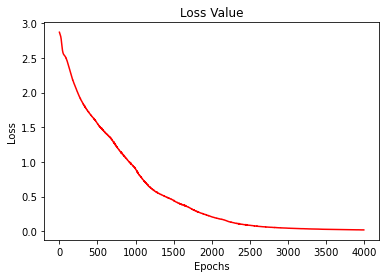

In [31]:
import matplotlib.pyplot as plt
plt.title('Loss Value')
plt.plot(np.array(loss_values), 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

---------------------------

참고문헌: http://cedartrees.co.kr/index.php/2020/08/01/pytorch-lstm-example/